<a href="https://colab.research.google.com/github/Parth11011/100-days-of-machine-learning/blob/main/customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#Loading important files
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [60]:
data=pd.read_csv("Customer Conversion Prediction - Customer Conversion Prediction.csv")
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [6]:
#Checking co-relation
data.corr()

,age,day,dur,num_calls
age,1.000000,-0.009120,-0.004648,0.00476
day,-0.009120,1.000000,-0.030206,0.16249
dur,-0.004648,-0.030206,1.000000,-0.08457
num_calls,0.004760,0.162490,-0.084570,1.00000


In [10]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [13]:
#Duplicate
data.duplicated().sum()

6

In [64]:
#Dropping duplicate
data=data.drop_duplicates()

In [16]:
data.duplicated().sum()

0

In [ ]:
#Converting days into weeks
def convert1(s):
  if s>=1 and s<=7:
    return "week"
  if s>7 and s<=14:
    return "week2"
  if s>14 and s<=21:
    return "week3"
  if s>21 and s<=31:
    return "week4"


In [ ]:
data["day"]=data["day"].apply(convert1)

<AxesSubplot:xlabel='day', ylabel='Count'>

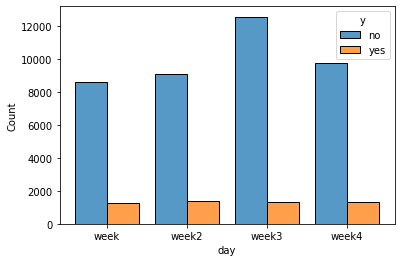

In [ ]:
sns.histplot( x=data["day"], hue=data["y"], multiple="dodge", shrink=.8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


AGE COLUMN IS RIGHT SKEWED

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.6848179257252598


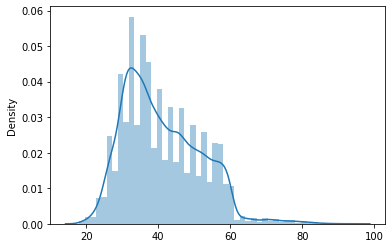

In [ ]:
#Plotting distplot for agecolumn
data["age"].skew()
sns.distplot(x=data['age'])
print(data["age"].skew())

In [ ]:
data["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [17]:
data["y"]=data["y"].apply(lambda x: 0 if x in "no" else 1)

<ipython-input-17-de1c3390969d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["y"]=data["y"].apply(lambda x: 0 if x in "no" else 1)


In [18]:
#checking percentage wise
education_qual=pd.DataFrame(((data.groupby('job')['y'].sum()*100/data.shape[0])).sort_values(ascending= False)).reset_index()
education_qual.rename(columns= {'target':'Percentage'}, inplace = True)
education_qual

,job,y
0,management,2.878000
1,technician,1.858202
2,blue-collar,1.566198
3,admin.,1.395863
4,retired,1.141467
5,services,0.816281
6,student,0.595067
7,unemployed,0.446853
8,self-employed,0.413671
9,entrepreneur,0.272094


In [ ]:
data["job"].value_counts()

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

In [19]:
def convert2(s):
  if s in "management":
    return 7
  if s in ['technician', 'admin.','blue-collar']:
    return 6
  if s in "retired":
    return 5
  elif s in ["services","student"]:
    return 4
  elif s in ['unemployed', 'self-employed']:
    return 3
  elif s in ['housemaid','entrepreneur']:
    return 2
  else:
    return 1

In [20]:
data["job"]=data["job"].apply(convert2)

<ipython-input-20-58c433f25995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["job"]=data["job"].apply(convert2)


In [ ]:
education_qual=pd.DataFrame(((data.groupby('job')['y'].mean()*100).round(decimals = 2)).sort_values(ascending= False)).reset_index()
education_qual.rename(columns= {'target':'Percentage'}, inplace = True)
education_qual

,job,y
0,student,28.68
1,retired,22.79
2,unemployed,15.50
3,management,13.76
4,admin.,12.20
5,self-employed,11.84
6,unknown,11.81
7,technician,11.06
8,services,8.88
9,housemaid,8.79


['blue-collar', 'management', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student', 'unknown']


<ipython-input-111-20718c443807>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(


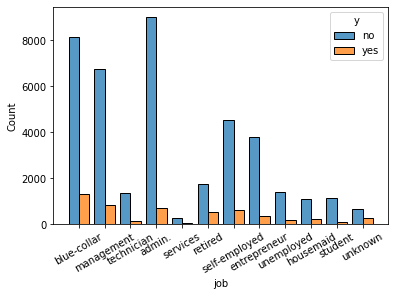

In [ ]:
label=[i for i in data["job"].value_counts().index]
print(label)
g=sns.histplot( x=data["job"], hue=data["y"], multiple="dodge", shrink=.8)
g.set_xticklabels(
    labels=label, rotation=30)
plt.show()

In [ ]:
data["day"].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
data['num_calls'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [22]:
def no_calls(s):
  if s>=1 and s<10:
    return 1
  elif s>=10 and s<20:
    return 2
  elif s>=20 and s<30:
    return 3
  elif s>=30 :
    return 4

In [23]:
data['num_calls'].value_counts()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [24]:
data['num_calls']=data['num_calls'].apply(no_calls)

<ipython-input-24-f22c77884da5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_calls']=data['num_calls'].apply(no_calls)


In [25]:
data["marital"].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

Marital Status can me taken as nominal data.


<AxesSubplot:xlabel='marital', ylabel='Count'>

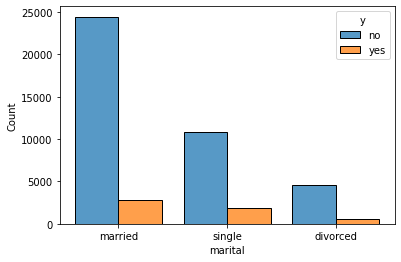

In [ ]:
sns.histplot( x=data["marital"], hue=data["y"], multiple="dodge", shrink=.8)

In [ ]:
education_qual=pd.DataFrame(((data.groupby('marital')['y'].mean()*100).round(decimals = 2)).sort_values(ascending= False)).reset_index()
education_qual.rename(columns= {'target':'Percentage'}, inplace = True)
(education_qual)


,marital,y
0,single,14.95
1,divorced,11.95
2,married,10.12


In [ ]:
data3=data.copy()

In [26]:
def convert4(s):
  if s=="married":
    return 3
  if s=="divorced":
    return 1
  else:
    return 2

In [27]:
data["marital"]=data["marital"].apply(convert4)

<ipython-input-27-480b7724c4fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["marital"]=data["marital"].apply(convert4)


In [ ]:
data["education_qual"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

<AxesSubplot:xlabel='education_qual', ylabel='Count'>

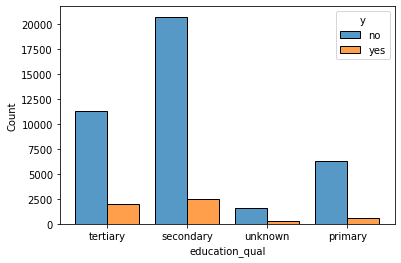

In [ ]:
sns.histplot( x=data["education_qual"], hue=data["y"], multiple="dodge", shrink=.8)

In [ ]:
education_qual=pd.DataFrame(((data.groupby('education_qual')['y'].mean()*100).round(decimals = 2)).sort_values(ascending= False)).reset_index()
education_qual.rename(columns= {'target':'Percentage'}, inplace = True)
education_qual

,education_qual,y
0,tertiary,15.01
1,unknown,13.57
2,secondary,10.56
3,primary,8.63


3.144318099423456


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

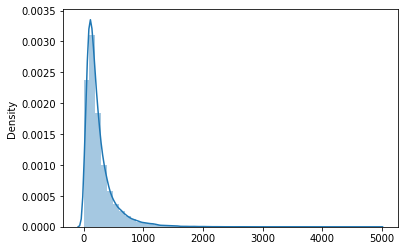

In [ ]:
print(data["dur"].skew())
sns.distplot(x=data['dur'])

Histplot clearly shows months like march, Feb, sep, has 50-50 ratio as compared to other months. but they have very less number of data counts as well so we are imputing it as ordinal column.

In [ ]:
education_qual=pd.DataFrame(((data.groupby('mon')['y'].mean()*100).round(decimals = 2)).sort_values(ascending= False)).reset_index()
education_qual.rename(columns= {'target':'Percentage'}, inplace = True)
education_qual

,mon,y
0,mar,51.99
1,dec,46.73
2,sep,46.46
3,oct,43.77
4,apr,19.68
5,feb,16.65
6,aug,11.01
7,jun,10.22
8,nov,10.15
9,jan,10.12


In [28]:
def convert5(s):
  if s in ["aug","jun","nov","jan","jul","may"]:
    return 1
  if s in ["apr","feb"]:
    return 2
  else:
    return 3

In [29]:
data["mon"]=data["mon"].apply(convert5)

<ipython-input-29-b8647b9fbefd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mon"]=data["mon"].apply(convert5)


In [30]:
data4=data.copy()

In [31]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,3,tertiary,unknown,5,1,261,1,unknown,0
1,44,6,2,secondary,unknown,5,1,151,1,unknown,0
2,33,2,3,secondary,unknown,5,1,76,1,unknown,0
3,47,6,3,unknown,unknown,5,1,92,1,unknown,0
4,33,1,2,unknown,unknown,5,1,198,1,unknown,0


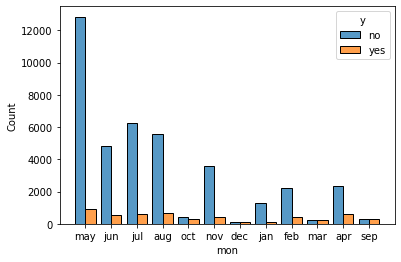

In [ ]:
g=sns.histplot( x=data["mon"], hue=data["y"], multiple="dodge", shrink=.8)
#g.set_xticklabels( rotation=30)
plt.show()

Unknown column has lowest ratio if conversion i.e 4% as compare to telephone and cellular so we would be doing ordinal encoding by combeing cellular and telephonic as one and unknown as other.

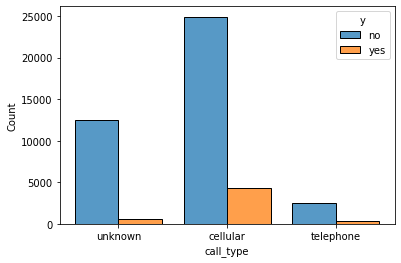

In [ ]:
g=sns.histplot( x=data["call_type"], hue=data["y"], multiple="dodge", shrink=.8)

plt.show()

In [35]:
call_type=["cellular","telephone"]
data["call_type"]=data["call_type"].apply(lambda x: x if x not in call_type else "cell_tell")

<ipython-input-35-c8e50d77aeef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["call_type"]=data["call_type"].apply(lambda x: x if x not in call_type else "cell_tell")


In [33]:
data["call_type"].value_counts()

cell_tell    32188
unknown      13017
Name: call_type, dtype: int64

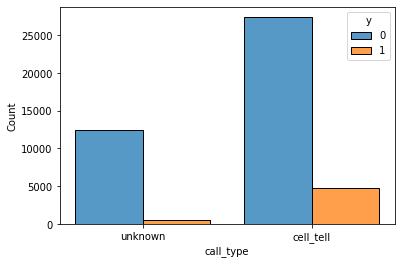

In [ ]:
g=sns.histplot( x=data["call_type"], hue=data["y"], multiple="dodge", shrink=.8)

plt.show()

In [ ]:
data["prev_outcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

we can see data point with previous output as "yes" i.e successful has more chances of yes this time too. will be doing simple imputer success followed by unknown failure and other


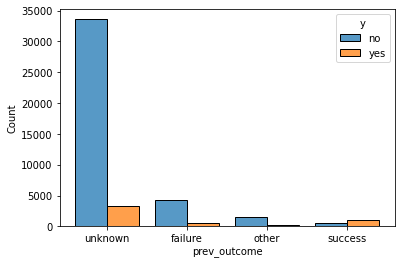

In [ ]:
g=sns.histplot( x=data["prev_outcome"], hue=data["y"], multiple="dodge", shrink=.8)

plt.show()

In [ ]:
education_qual=pd.DataFrame(((data.groupby('prev_outcome')['y'].mean()*100).round(decimals = 2)).sort_values(ascending= False)).reset_index()
education_qual.rename(columns= {'target':'Percentage'}, inplace = True)
education_qual

,prev_outcome,y
0,success,64.73
1,other,16.68
2,failure,12.61
3,unknown,9.16


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Separate the features and target variables
X = data['mon']
y = data['y']

# Encode the categorical month variable using one-hot encoding
X = pd.get_dummies(X, prefix='mon')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Evaluate the accuracy and classification report of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print('Classification report:', report)


Accuracy: 0.880128276014597
Classification report:               precision    recall  f1-score   support

          no       0.88      0.99      0.94      7952
         yes       0.53      0.05      0.09      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.52      0.51      9043
weighted avg       0.84      0.88      0.83      9043



In [ ]:
# Define a function to calculate Cramér's V
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V between the feature column and target column
for i in s:
  if i!="y":
    v = cramers_v(data[i], data['y'])
    print('Cramer\'s V:{} for {}'.format(v,i))



Cramer's V:0.3115595878598643 for prev_outcome
Cramer's V:0.15121086009936358 for call_type
Cramer's V:0.13509442287956416 for job
Cramer's V:0.0655900517501773 for marital
Cramer's V:0.07223842896844937 for education_qual
Cramer's V:0.2597720189041719 for mon


In [ ]:
v = cramers_v(data['education_qual'], data['mon'])
print('Cramer\'s V:', v)

Cramer's V: 0.10899797152810663


In [ ]:
c=data["age"].value_counts()

In [36]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,3,tertiary,unknown,5,1,261,1,unknown,0
1,44,6,2,secondary,unknown,5,1,151,1,unknown,0
2,33,2,3,secondary,unknown,5,1,76,1,unknown,0
3,47,6,3,unknown,unknown,5,1,92,1,unknown,0
4,33,1,2,unknown,unknown,5,1,198,1,unknown,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
 11  y_              45211 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.1+ MB


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

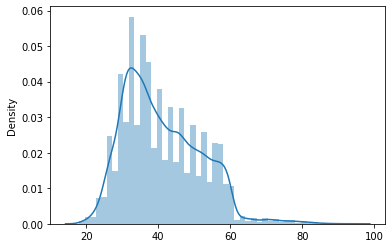

In [ ]:
data["age"].skew()
sns.distplot(x=data['age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

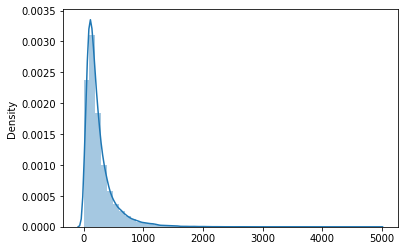

In [ ]:
data["age"].skew()
sns.distplot(x=data['dur'])

In [ ]:
data["dur"].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [ ]:
data["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

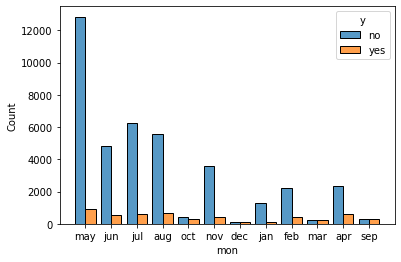

In [ ]:
g=sns.histplot( x=data["mon"], hue=data["y"], multiple="dodge", shrink=.8)
#g.set_xticklabels( rotation=30)
plt.show()

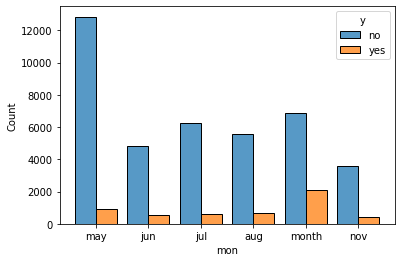

In [ ]:
g=sns.histplot( x=data["mon"], hue=data["y"], multiple="dodge", shrink=.8)
#g.set_xticklabels( rotation=30)
plt.show()

In [ ]:
data["call_type"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [57]:
data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
data[(data["call_type"]=="unknown") & (data["y"]=="yes")]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
83,59,admin.,married,secondary,unknown,5,may,1042,1,unknown,yes
86,56,admin.,married,secondary,unknown,5,may,1467,1,unknown,yes
87,41,technician,married,secondary,unknown,5,may,1389,1,unknown,yes
129,55,services,married,secondary,unknown,5,may,579,1,unknown,yes
168,54,admin.,married,tertiary,unknown,5,may,673,2,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
44489,31,blue-collar,married,secondary,unknown,10,aug,97,1,other,yes
44550,29,self-employed,single,tertiary,unknown,13,aug,461,1,unknown,yes
44615,34,admin.,single,tertiary,unknown,31,aug,34,1,unknown,yes
44687,52,management,married,unknown,unknown,6,c_month,310,1,failure,yes


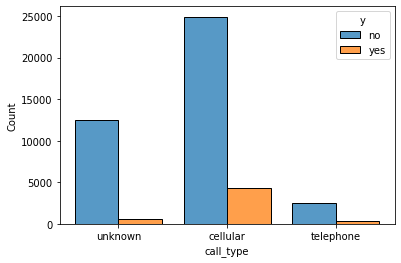

In [ ]:
g=sns.histplot( x=data["call_type"], hue=data["y"], multiple="dodge", shrink=.8)

plt.show()

<ipython-input-16-61e42da948b7>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(


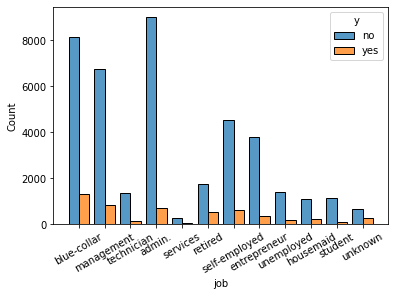

In [ ]:
g=sns.histplot( x=data["job"], hue=data["y"], multiple="dodge", shrink=.8)
g.set_xticklabels(
    labels=label, rotation=30)
plt.show()

<AxesSubplot:xlabel='education_qual', ylabel='Count'>

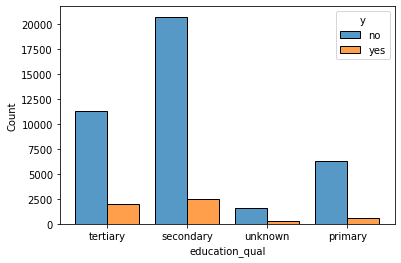

In [ ]:
sns.histplot( x=data["education_qual"], hue=data["y"], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='marital', ylabel='Count'>

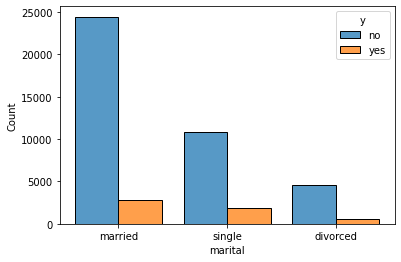

In [ ]:
sns.histplot( x=data["marital"], hue=data["y"], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='age', ylabel='dur'>

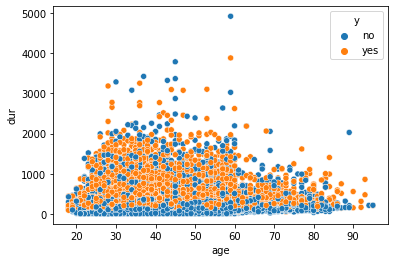

In [ ]:
sns.scatterplot(x=data["age"],y=data["dur"],hue=data["y"])

In [ ]:
import numpy as np
log_transform = FunctionTransformer(np.log, validate=True)

# apply the log transform to the 'age' column
data['log_age'] = log_transform.transform(data[['age']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

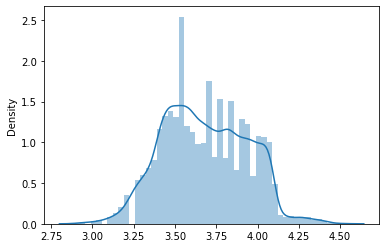

In [ ]:
sns.distplot(x=data['log_age'])

In [ ]:
data['log_age']

In [ ]:
data["age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
q3=48.000000
q1=33.000000
iqr=q3-q1
upper =q3+iqr*1.5
lower=q1-iqr*1.5
print("upper range is {} and lower range is {}".format(upper,lower))

upper range is 70.5 and lower range is 10.5


In [ ]:

def x(s):
  if s>70.5:
    c+=1
  return c
  

In [ ]:
data["age"].skew()

0.6848179257252598

In [ ]:
data["call_type"].value_counts()

In [ ]:
s=["prev_outcome","call_type", "job","marital","education_qual","y","mon"]

In [ ]:
#Calculating chi-square
f=input("Target column against whos's chi2 value need to be calculated:")
def chi2(s,f):
  Feature_name=[];Chi_Squared_Statistic=[];P_value=[];Degrees_of_Freedom=[]
  for i in s:
    if i!=f:
      cat_col = data[i]
      # extract the categorical column and target column
      target_col = data[f]
      # create a contingency table
      contingency_table = pd.crosstab(cat_col, target_col)

      # perform the chi-squared test and get the test statistic, p-value, degrees of freedom, and expected frequencies
      chi2_stat, p_val, dof, expected_freq = chi2_contingency(contingency_table)
      Feature_name.append(i)
      Chi_Squared_Statistic.append(chi2_stat)
      P_value.append(p_val)
      Degrees_of_Freedom.append(dof)
  #c['Expected Frequencies'] =expected_freq
  cx={}
  cx["Feature_name"]=Feature_name;cx["Chi_Squared_Statistic"]=Chi_Squared_Statistic;cx["P_value"]=P_value;cx["Degrees_of_Freedom"]=Degrees_of_Freedom
  return cx
q=chi2(s,f)
pd.DataFrame(q)





Target column against whos's chi2 value need to be calculated:y


,Feature_name,Chi_Squared_Statistic,P_value,Degrees_of_Freedom
0,prev_outcome,4391.506589,0.000000e+00,3
1,call_type,1035.714225,1.251738e-225,2
2,job,836.105488,3.337122e-172,11
3,marital,196.495946,2.145100e-43,2
4,education_qual,238.923506,1.626656e-51,3
5,mon,3061.838938,0.000000e+00,11


In [ ]:
data["prev_outcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
s=["prev_outcome","call_type", "job","marital","education_qual","mon"]

In [55]:
data4.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,3,tertiary,unknown,5,1,261,1,unknown,0
1,44,6,2,secondary,unknown,5,1,151,1,unknown,0
2,33,2,3,secondary,unknown,5,1,76,1,unknown,0
3,47,6,3,unknown,unknown,5,1,92,1,unknown,0
4,33,1,2,unknown,unknown,5,1,198,1,unknown,0


In [61]:
data["y"]

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [111]:
def convert(s):
  if s=="yes":
    return 1
  else:
    return 0

In [112]:
upsampled_data["target"]=upsampled_data["target"].apply(convert)

In [65]:
data["y_"]=data["y"].apply(convert)
data["y_"].value_counts()

0    39916
1     5289
Name: y_, dtype: int64

In [113]:
upsampled_data["target"].value_counts()

0    39914
1    39914
Name: target, dtype: int64

In [110]:
upsampled_data.head()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,target
0,58,7,3,tertiary,unknown,1,261,1,unknown,no
1,44,6,2,secondary,unknown,1,151,1,unknown,no
2,33,2,3,secondary,unknown,1,76,1,unknown,no
3,47,6,3,unknown,unknown,1,92,1,unknown,no
4,33,1,2,unknown,unknown,1,198,1,unknown,no


In [107]:
data=pd.read_csv("file3.csv")

In [108]:
data.head()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,target
0,58,7,3,tertiary,unknown,1,261,1,unknown,no
1,44,6,2,secondary,unknown,1,151,1,unknown,no
2,33,2,3,secondary,unknown,1,76,1,unknown,no
3,47,6,3,unknown,unknown,1,92,1,unknown,no
4,33,1,2,unknown,unknown,1,198,1,unknown,no


In [40]:
data = data.drop('day', axis=1)
data.head()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,y,y_
0,58,7,3,tertiary,unknown,1,261,1,unknown,0,0
1,44,6,2,secondary,unknown,1,151,1,unknown,0,0
2,33,2,3,secondary,unknown,1,76,1,unknown,0,0
3,47,6,3,unknown,unknown,1,92,1,unknown,0,0
4,33,1,2,unknown,unknown,1,198,1,unknown,0,0


In [71]:
df=df.drop(["Unnamed: 0"], axis=1)

In [72]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,y_
0,58,7,3,tertiary,unknown,5,1,261,1,unknown,0,0
1,44,6,2,secondary,unknown,5,1,151,1,unknown,0,0
2,33,2,3,secondary,unknown,5,1,76,1,unknown,0,0
3,47,6,3,unknown,unknown,5,1,92,1,unknown,0,0
4,33,1,2,unknown,unknown,5,1,198,1,unknown,0,0


In [75]:
df.head()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome
0,58,7,3,tertiary,unknown,1,261,1,unknown
1,44,6,2,secondary,unknown,1,151,1,unknown
2,33,2,3,secondary,unknown,1,76,1,unknown
3,47,6,3,unknown,unknown,1,92,1,unknown
4,33,1,2,unknown,unknown,1,198,1,unknown


In [97]:
df["target"]=data["y"]

In [98]:
df.sample(5)

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,target
32563,32,6,2,tertiary,cell_tell,2,115,1,unknown,no
378,33,7,3,tertiary,unknown,1,290,1,unknown,no
39507,55,7,3,tertiary,cell_tell,1,85,1,unknown,yes
7752,42,6,3,primary,unknown,1,53,1,unknown,no
43219,30,6,3,tertiary,cell_tell,3,172,1,unknown,yes


In [106]:
df.to_csv('file3.csv',index=False)

In [76]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,y_
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


In [114]:
upsampled_data.head()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,target
0,58,7,3,tertiary,unknown,1,261,1,unknown,0
1,44,6,2,secondary,unknown,1,151,1,unknown,0
2,33,2,3,secondary,unknown,1,76,1,unknown,0
3,47,6,3,unknown,unknown,1,92,1,unknown,0
4,33,1,2,unknown,unknown,1,198,1,unknown,0


In [116]:
X=upsampled_data.iloc[:,:9]
y=upsampled_data.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2)

In [79]:
transformer = ColumnTransformer(transformers=[
    ('education_qual',OrdinalEncoder(categories=[["primary","secondary","unknown","tertiary"]]),["education_qual"]),
    ('call_type',OrdinalEncoder(categories=[["unknown","cell_tell"]]),["call_type"]),
    ('prev_call',OrdinalEncoder(categories=[["unknown","failure","other","success"]]),["prev_outcome"])
],remainder='passthrough')


In [88]:
X_train=transformer.fit_transform(X_train)

In [87]:
X_test=transformer.fit_transform(X_test)

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

for i in range(1,20,2):
  skf = StratifiedKFold(n_splits=10, random_state=None)
  skf.get_n_splits(X_train, y_train)
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  y_predict_knn = knn.predict(X_test)
  print('k-value:', i, 'Train-Score:', knn.score(X_train,y_train), 'Stratified CV_Score:', roc_auc_score(y_test, y_predict_knn) )

k-value: 1 Train-Score: 0.9987833204291561 Stratified CV_Score: 0.6700266781136178
k-value: 3 Train-Score: 0.9339674814732883 Stratified CV_Score: 0.6759598381323803
k-value: 5 Train-Score: 0.921496515872138 Stratified CV_Score: 0.6910017324555804
k-value: 7 Train-Score: 0.9165191903550493 Stratified CV_Score: 0.6833211065355512
k-value: 9 Train-Score: 0.9133115805773697 Stratified CV_Score: 0.679363270239376
k-value: 11 Train-Score: 0.911099435903108 Stratified CV_Score: 0.6737363552732465
k-value: 13 Train-Score: 0.9103251852671165 Stratified CV_Score: 0.6743192273123888
k-value: 15 Train-Score: 0.9091638093131291 Stratified CV_Score: 0.6712754677986633
k-value: 17 Train-Score: 0.9076982634664307 Stratified CV_Score: 0.6723616744294756
k-value: 19 Train-Score: 0.9072834863400067 Stratified CV_Score: 0.6692716187153052


In [93]:
kn = KNeighborsClassifier(9)
kn.fit(X_train, y_train)
y_predict_knn = kn.predict(X_test)

print('Train-Score:', kn.score(X_test, y_test))
print('Train-Score:', kn.score(X_test, y_test))
print('AUROC Score:', roc_auc_score(y_test, y_predict_knn))

Train-Score: 0.8984625594513881
Train-Score: 0.8984625594513881
AUROC Score: 0.679363270239376


In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
import numpy as np

for depth in range(1,31):
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train)
  trainaccuracy = accuracy_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeClassifier(max_depth=depth)
  valaccuracy = cross_val_score(dt, X_train, y_train, cv=10)
  print('Depth:',depth, 'Training Accuracy:',trainaccuracy, 'CV_Score:', np.mean(valaccuracy))

Depth: 1 Training Accuracy: 0.8840006636434022 CV_Score: 0.8840006768064279
Depth: 2 Training Accuracy: 0.8964992810529808 CV_Score: 0.8951720886619479
Depth: 3 Training Accuracy: 0.9015319101869262 CV_Score: 0.9003982774924705
Depth: 4 Training Accuracy: 0.9033016259263356 CV_Score: 0.9018084692858943
Depth: 5 Training Accuracy: 0.9042417874128968 CV_Score: 0.9014765802956051
Depth: 6 Training Accuracy: 0.9067857537882977 CV_Score: 0.9010343012103611
Depth: 7 Training Accuracy: 0.908942594845703 CV_Score: 0.9008960956862995
Depth: 8 Training Accuracy: 0.9117630793053866 CV_Score: 0.9004259170681224
Depth: 9 Training Accuracy: 0.914970689083066 CV_Score: 0.8982966528512113
Depth: 10 Training Accuracy: 0.9192843711978763 CV_Score: 0.8961950358557548
Depth: 11 Training Accuracy: 0.9253677690520961 CV_Score: 0.8941212572268122
Depth: 12 Training Accuracy: 0.9310363897798916 CV_Score: 0.8935682134022963
Depth: 13 Training Accuracy: 0.9371197876341113 CV_Score: 0.8908581969729962
Depth: 14 

In [96]:
tr = DecisionTreeClassifier(max_depth=8)
tr.fit(X_train, y_train)
y_predict_dt = tr.predict(X_test)

print('Training Accuracy:', tr.score(X_train, y_train))
print('Test Accuracy    :', tr.score(X_test, y_test))
print('AUROC Score      :',roc_auc_score(y_test, y_predict_dt))

Training Accuracy: 0.9117354274969584
Test Accuracy    : 0.9007853113593629
AUROC Score      : 0.6956611430986225


In [ ]:
#upsampling data

# Separate the majority and minority classes
majority_class = data[data['target']=="no"]
minority_class = data[data['target']=="yes"]

# Upsample the minority class
minority_upsampled = resample(minority_class, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority_class),    # to match majority class
                              random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Show the number of samples in each class
print(upsampled_data['target'].value_counts())

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2)

In [118]:
#Column Transform to convert caterogical column into numerical
transformer = ColumnTransformer(transformers=[
    ('education_qual',OrdinalEncoder(categories=[["primary","secondary","unknown","tertiary"]]),["education_qual"]),
    ('call_type',OrdinalEncoder(categories=[["unknown","cell_tell"]]),["call_type"]),
    ('prev_call',OrdinalEncoder(categories=[["unknown","failure","other","success"]]),["prev_outcome"])
],remainder='passthrough')


In [119]:
X_train=transformer.fit_transform(X_train)

In [120]:
X_test=transformer.fit_transform(X_test)

In [121]:
#Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

for i in range(1,20,2):
  skf = StratifiedKFold(n_splits=10, random_state=None)
  skf.get_n_splits(X_train, y_train)
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  y_predict_knn = knn.predict(X_test)
  print('k-value:', i, 'Train-Score:', knn.score(X_train,y_train), 'Stratified CV_Score:', roc_auc_score(y_test, y_predict_knn) )

k-value: 1 Train-Score: 0.995662522313739 Stratified CV_Score: 0.931391502106079
k-value: 3 Train-Score: 0.9398077103754972 Stratified CV_Score: 0.8862920645981336
k-value: 5 Train-Score: 0.8923146785255708 Stratified CV_Score: 0.8421773047883565
k-value: 7 Train-Score: 0.8562212270207635 Stratified CV_Score: 0.8045665226625031
k-value: 9 Train-Score: 0.8265791863706117 Stratified CV_Score: 0.7761871783059122
k-value: 11 Train-Score: 0.8042654473708934 Stratified CV_Score: 0.7518364803227902
k-value: 13 Train-Score: 0.7879490150637312 Stratified CV_Score: 0.7386825659884474
k-value: 15 Train-Score: 0.7743415489649557 Stratified CV_Score: 0.7304611184442813
k-value: 17 Train-Score: 0.7632081676114121 Stratified CV_Score: 0.7254457386125523
k-value: 19 Train-Score: 0.7550029751652 Stratified CV_Score: 0.7236353279955026


In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
import numpy as np

for depth in range(1,35):
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train)
  trainaccuracy = accuracy_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeClassifier(max_depth=depth)
  valaccuracy = cross_val_score(dt, X_train, y_train, cv=10)
  print('Depth:',depth, 'Training Accuracy:',trainaccuracy, 'CV_Score:', np.mean(valaccuracy))

Depth: 1 Training Accuracy: 0.6121480692743728 CV_Score: 0.6121480437258757
Depth: 2 Training Accuracy: 0.6568068648022298 CV_Score: 0.6568068183439673
Depth: 3 Training Accuracy: 0.6568068648022298 CV_Score: 0.6568068183439673
Depth: 4 Training Accuracy: 0.6745169271241114 CV_Score: 0.6744229649257705
Depth: 5 Training Accuracy: 0.6791832388587893 CV_Score: 0.6777895722750726
Depth: 6 Training Accuracy: 0.6828630484482164 CV_Score: 0.6803889080206227
Depth: 7 Training Accuracy: 0.6888760139049827 CV_Score: 0.6834893791418141
Depth: 8 Training Accuracy: 0.6924462121449375 CV_Score: 0.6877329268154548
Depth: 9 Training Accuracy: 0.6995396323322164 CV_Score: 0.6936205638302552
Depth: 10 Training Accuracy: 0.7085434217531552 CV_Score: 0.6994457403517588
Depth: 11 Training Accuracy: 0.7177351163446181 CV_Score: 0.7066017892494301
Depth: 12 Training Accuracy: 0.7302934452413016 CV_Score: 0.7160439446689665
Depth: 13 Training Accuracy: 0.7429144091948263 CV_Score: 0.7249694133347415
Depth: 1

In [126]:
tr = DecisionTreeClassifier(max_depth=38)
tr.fit(X_train, y_train)
y_predict_dt = tr.predict(X_test)

print('Training Accuracy:', tr.score(X_train, y_train))
print('Test Accuracy    :', tr.score(X_test, y_test))
print('AUROC Score      :',roc_auc_score(y_test, y_predict_dt))

Training Accuracy: 0.9955842284926874
Test Accuracy    : 0.9321057246649129
AUROC Score      : 0.932657442308977


In [130]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(n_estimators=100,max_depth=18, max_features='sqrt')
tree.fit(X_train,y_train)
y_pred_rf = tree.predict(X_test)

print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy  :",tree.score(X_test,y_test))
print("AUROC Score       :", roc_auc_score(y_test,y_pred_rf))

Training Accuracy : 0.9073314334032758
Testing Accuracy  : 0.8578228736064136
AUROC Score       : 0.8578624718154899


In [131]:
from xgboost import XGBClassifier

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.2,0.5,0.7,1]:
    model = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) 
    model.fit(X_train,y_train) 
    model.score(X_test, y_test) 
    print('Learning rate :', lr, 'Train score :', model.score(X_train,y_train), 'CV_Score :', np.mean(cross_val_score(model, X_train, y_train, cv=10))) 

Learning rate : 0.01 Train score : 0.6902853026839122 CV_Score : 0.6861983027005754
Learning rate : 0.02 Train score : 0.6948106855406971 CV_Score : 0.6909272701052497
Learning rate : 0.03 Train score : 0.698239954902759 CV_Score : 0.6933700329185137
Learning rate : 0.04 Train score : 0.7024834800037582 CV_Score : 0.6969558771877047
Learning rate : 0.05 Train score : 0.7071811092668566 CV_Score : 0.7001659312186304
Learning rate : 0.06 Train score : 0.7101719332310295 CV_Score : 0.7037361039745085
Learning rate : 0.07 Train score : 0.7138987191130876 CV_Score : 0.7052080395843989
Learning rate : 0.08 Train score : 0.7200995897403777 CV_Score : 0.7073219997302107
Learning rate : 0.09 Train score : 0.7243900911340077 CV_Score : 0.7116906841434442
Learning rate : 0.1 Train score : 0.7264413892455608 CV_Score : 0.7151513622521789
Learning rate : 0.11 Train score : 0.7309197958097147 CV_Score : 0.7173592705704916
Learning rate : 0.12 Train score : 0.7363847045191193 CV_Score : 0.72111734212